In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

In [4]:
data = {}

result_file_paths = {"local": "./local", "kubernetes": "./kubernetes", "slurm": "./slurm"}
for env, result_file_path in result_file_paths.items():
    with open(result_file_path, 'r') as f:
        arr = f.readlines()
        arr = [float(val) for val in arr]
        data[env] = arr
        
print(data)

{'local': [4035.0, 4023.0, 4036.0, 4021.0, 4056.0], 'kubernetes': [1194.0, 965.0, 1021.0, 894.0, 934.0], 'slurm': [234.0, 262.0, 253.0, 201.0, 224.0]}


In [5]:
arr = []

for mode, values in data.items():
    for v in values:
        arr.append([v, mode])

df = pd.DataFrame(np.array(arr), columns=['duration', 'environment'])

In [6]:
df[['duration']] = df[['duration']].apply(pd.to_numeric) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   duration     15 non-null     float64
 1   environment  15 non-null     object 
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


Text(0, 0.5, 'Duration (s)')

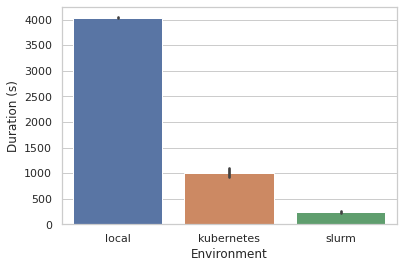

In [8]:
ax = sns.barplot(x="environment", y="duration", data=df)
plt.xlabel("Environment")
plt.ylabel("Duration (s)")

In [9]:
ax.figure.savefig("../paper/figures/plot.png", dpi=200)